<a href="https://colab.research.google.com/github/Ahmed-Shatla/Detect-Person-Class-from-img-Collage-project-./blob/main/Detect_Person_Class_CNN_without_Augmentation%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#needed libraries

In [1]:
import numpy as np
import pandas as pd
import os
import random 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import cv2


#data path and number of classes

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_path = '/content/drive/MyDrive/Faces data/CroppedYale'
len(os.listdir(data_path))

38

#Create lists that contain images and its labels

In [4]:
def read_img(path):
  files_names = os.listdir(path) 
  imgs = []
  target = []
  for i in files_names:
    for j in os.listdir(path+'/'+i):
      if '.pgm' in j:
        img = cv2.imread(path+'/'+i+'/'+j)
        imgs.append(img)
        target.append(i)
  return imgs,target

#X ==> Images
#y ==> labels

In [5]:
from sklearn.model_selection import train_test_split
X,y = read_img(data_path)


In [6]:
X = np.array(X)
y = np.array(y).reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


#all images size = (192,168)

In [7]:
def resize_images(images):
  imgs = []
  images1 = np.asarray(images)
  for i in images1:
    img = cv2.resize(i,(168, 192))
    imgs.append(img)

  return imgs

In [8]:
images = resize_images(X)
images[1].shape

(192, 168, 3)

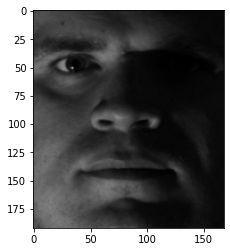

In [9]:
plt.imshow(X[20])

#Splitting data to 90% train and 10% test

In [10]:
X_train, X_test, y_train, y_test =train_test_split(images,y,test_size=0.1,shuffle=True,random_state=1)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [11]:
X_train.shape

(2223, 192, 168, 3)

In [12]:
y_train

array([['yaleB13'],
       ['yaleB10'],
       ['yaleB12'],
       ...,
       ['yaleB12'],
       ['yaleB08'],
       ['yaleB12']], dtype='<U7')

#CNN Model 1 ( without augmentation)

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Activation,MaxPool2D,Flatten

In [14]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(192,168,3)))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dense(units=38,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 190, 166, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 95, 83, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 81, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 40, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 58880)             0         
                                                                 
 dense (Dense)               (None, 64)                3

In [15]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_test.shape

(247, 38)

In [19]:
X_train.shape

(2223, 192, 168, 3)

In [20]:
train_gen = ImageDataGenerator()
valid_gen = ImageDataGenerator()

In [21]:
X_train, X_valid, y_train, y_valid =train_test_split(X_train,y_train,test_size=0.1,shuffle=True,random_state=1)
X_valid.shape

(223, 192, 168, 3)

In [22]:
trainG = train_gen.flow(X_train,y_train,batch_size=32)
validG = valid_gen.flow(X_valid,y_valid,batch_size=16)

In [23]:
steps_train = int(len(X_train)/32)
steps_validate = int(len(X_valid)/16)

In [24]:
history = model.fit_generator(trainG,
                                  steps_per_epoch=steps_train, 
                                  epochs=16,
                                  validation_data=validG,
                                  validation_steps=steps_validate,
                                  verbose=1,
                                  shuffle = 1)

Epoch 1/16


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


62/62 [==============================] - 46s 725ms/step - loss: 41.8647 - accuracy: 0.3242 - val_loss: 1.2437 - val_accuracy: 0.6971
Epoch 2/16
62/62 [==============================] - 45s 722ms/step - loss: 0.9457 - accuracy: 0.8272 - val_loss: 0.4908 - val_accuracy: 0.8894
Epoch 3/16
62/62 [==============================] - 46s 734ms/step - loss: 0.2004 - accuracy: 0.9680 - val_loss: 0.2979 - val_accuracy: 0.9327
Epoch 4/16
62/62 [==============================] - 44s 704ms/step - loss: 0.1503 - accuracy: 0.9776 - val_loss: 0.4728 - val_accuracy: 0.8894
Epoch 5/16
62/62 [==============================] - 44s 706ms/step - loss: 0.7716 - accuracy: 0.9629 - val_loss: 0.3516 - val_accuracy: 0.9471
Epoch 6/16
62/62 [==============================] - 44s 715ms/step - loss: 0.7714 - accuracy: 0.9624 - val_loss: 3.1460 - val_accuracy: 0.6923
Epoch 7/16
62/62 [==============================] - 44s 709ms/step - loss: 0.1235 - accuracy: 0.9878 - val_loss: 0.2797 - val_accuracy: 0.9615
Epoch 8/1

In [25]:
test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)
print("test accurecy without augmentation")
print(test_acc)

8/8 - 2s - loss: 0.2701 - accuracy: 0.9393 - 2s/epoch - 210ms/step
test accurecy without augmentation
0.9392712712287903


Text(0.5, 0, 'epochs')

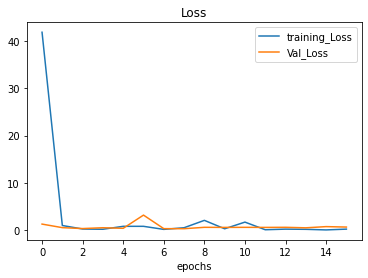

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_Loss','Val_Loss'])
plt.title('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

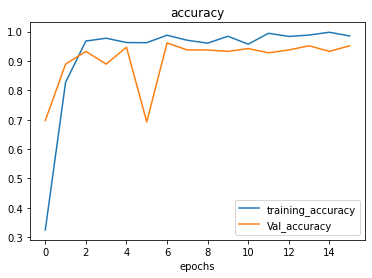

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training_accuracy','Val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')

In [35]:
train_gen_augmanted = ImageDataGenerator(rotation_range=30,
                                         zoom_range=0.15,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         horizontal_flip=True)
trainGaug = train_gen_augmanted.flow(X_train,y_train,batch_size=32)


In [ ]:
history = model.fit_generator(trainGaug,
                                  steps_per_epoch=steps_train, 
                                  epochs=16,
                                  validation_data=validG,
                                  validation_steps=steps_validate,
                                  verbose=1,
                                  shuffle = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/16
62/62 [==============================] - 56s 904ms/step - loss: 3.2431 - accuracy: 0.1357 - val_loss: 2.4752 - val_accuracy: 0.3173
Epoch 2/16
62/62 [==============================] - 58s 930ms/step - loss: 3.9901 - accuracy: 0.1458 - val_loss: 2.2837 - val_accuracy: 0.3413
Epoch 3/16
62/62 [==============================] - 57s 917ms/step - loss: 3.1400 - accuracy: 0.1413 - val_loss: 2.4114 - val_accuracy: 0.3269
Epoch 4/16
62/62 [==============================] - 57s 920ms/step - loss: 3.0863 - accuracy: 0.1590 - val_loss: 2.3205 - val_accuracy: 0.3221
Epoch 5/16
62/62 [==============================] - 57s 909ms/step - loss: 3.1185 - accuracy: 0.1667 - val_loss: 2.2524 - val_accuracy: 0.3413
Epoch 6/16
62/62 [==============================] - 56s 906ms/step - loss: 3.0777 - accuracy: 0.1509 - val_loss: 2.3845 - val_accuracy: 0.3125
Epoch 7/16
62/62 [==============================] - 56s 905ms/step - loss: 3.0631 - accuracy: 0.1651 - val_loss: 2.3937 - val_accuracy: 0.3365

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)
print("test accurecy with augmentation")
print(test_acc)

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

plt.legend(['training_Loss','Val_Loss'])
plt.title('Loss')
plt.xlabel('epochs')

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training_accuracy','Val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')